In [1]:
import csv
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import math
from scipy import stats
from collections import Counter, defaultdict
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [10, 5]
import pandas as pd
from os import listdir
from random import random

In [2]:
def read_csv(fname: str) -> List[List[str]]:
	data = []
	with open(fname, 'r') as csvfile:
	    spamreader = csv.reader(csvfile)
	    for row in spamreader:
	    	data.append(row)
	return data

In [3]:
data = read_csv('full_marathon_2008_2021.csv')
df = pd.DataFrame(data[1:], columns=data[0])
Counter(df['Year'])

Counter({'2008': 4450,
         '2009': 5101,
         '2010': 5992,
         '2011': 6040,
         '2012': 6494,
         '2013': 5827,
         '2014': 6624,
         '2015': 6071,
         '2016': 6335,
         '2017': 6586,
         '2018': 5264,
         '2019': 5226,
         '2021': 3185})

In [5]:
df.at[df['Sex'] == 'f', 'Sex'] = 'F'
Counter(df['Sex'])

Counter({'M': 48754, 'F': 24441})

In [12]:
df['Age'] = pd.to_numeric(df['Age'])
df['Time Mins'] = pd.to_numeric(df['Time Mins'])
df['Birth'] = df['Birth'].apply(str)
df.sort_values(by='Time Mins')

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
70010,2021,1,Greg Billington,"San Francisco, CA",999,2:20:42,5:22,M 30-34/1,M-32,1,2:20:42,87.41%,140.700000,1989.0,M,32.0,M 30-34,CA,USA,San Francisco
9551,2010,1,Keith Bechtol,"Palo Alto, CA",30811,2:23:29,5:29,M 25-29/0,M-25,1,2:23:29,87.08%,143.483333,1985.0,M,25.0,M 25-29,CA,USA,Palo Alto
70011,2021,2,Weston Strum,"San Jose, CA",748,2:23:35,5:29,M 25-29/1,M-29,2,2:23:35,85.63%,143.583333,1992.0,M,29.0,M 25-29,CA,USA,San Jose
28077,2013,1,Francois Lhuissier,"New York,",3,2:25:15,5:33,M 35-39/0,M-35,1,2:25:15,85.09%,145.250000,1978.0,M,35.0,M 35-39,,New York,n/a
9552,2010,2,Michael Wardian,"Arlington, VA",11,2:25:21,5:33,M 35-39/0,M-36,2,2:25:21,86.04%,145.350000,1974.0,M,36.0,M 35-39,VA,USA,Arlington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59518,2017,6585,Richard Lee,"CA,",80306,8:50:15,20:14,M 30-34/748,M-33,4223,9:14:36,23.21%,530.250000,1984.0,M,33.0,M 30-34,,CA,n/a
21580,2011,6038,Rhea Sanchez,"Suisun City, CA",12000,8:51:35,20:17,F 30-34/392,F-31,2010,9:56:06,25.48%,531.583333,1980.0,F,31.0,F 30-34,CA,USA,Suisun City
21581,2011,6039,Alejandro Irineo,"Riverside, CA",11928,8:52:46,20:20,M 35-39/613,M-38,4029,9:56:06,23.46%,532.766667,1973.0,M,38.0,M 35-39,CA,USA,Riverside
46598,2015,6071,Doreen Sanuki,"Torrance, CA",31165,9:00:34,20:38,F 50-54/121,F-52,2045,9:13:37,29.21%,540.566667,1963.0,F,52.0,F 50-54,CA,USA,Torrance


In [7]:
df.head(50)

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
0,2008,1,Chad Worthen,"Sacramento, CA",29,2:31:52,5:48,M 30-34/0,M-34,1,2:31:52,82.26%,151.866667,1974.0,M,34.0,M 30-34,CA,USA,Sacramento
1,2008,2,Mustapha Berri,"FR,",7,2:33:57,5:53,M 40-44/0,M-44,2,2:33:57,85.97%,153.950000,1964.0,M,44.0,M 40-44,,FR,n/a
2,2008,3,Mark Pilja,"San Francisco, CA",1121,2:38:20,6:03,M 25-29/0,M-28,3,2:38:20,78.90%,158.333333,1980.0,M,28.0,M 25-29,CA,USA,San Francisco
3,2008,4,Jonah Backstrom,"San Francisco, CA",19,2:39:57,6:07,M 30-34/1,M-34,4,2:39:57,78.11%,159.950000,1974.0,M,34.0,M 30-34,CA,USA,San Francisco
4,2008,5,Eric Bowles,"Los Angeles, CA",1074,2:40:24,6:08,M 20-24/1,M-22,5,2:40:24,77.93%,160.400000,1986.0,M,22.0,M 20-24,CA,USA,Los Angeles
5,2008,6,Antonio Lopez,"Santa Fe, NM",9,2:41:38,6:10,M 25-29/1,M-28,6,2:41:38,77.29%,161.633333,1980.0,M,28.0,M 25-29,NM,USA,Santa Fe
6,2008,7,Chikara Omine,"San Francisco, CA",1114,2:41:49,6:11,M 25-29/2,M-25,7,2:41:49,77.20%,161.816667,1983.0,M,25.0,M 25-29,CA,USA,San Francisco
7,2008,8,Jason McCullough,"Hays, KS",23,2:41:58,6:11,M 30-34/2,M-32,8,2:41:58,77.13%,161.966667,1976.0,M,32.0,M 30-34,KS,USA,Hays
8,2008,9,Josh Wright,"Lakewood, CO",1060,2:42:33,6:12,M 25-29/3,M-26,9,2:42:33,76.86%,162.550000,1982.0,M,26.0,M 25-29,CO,USA,Lakewood
9,2008,10,Mongo Romero,"Los Angeles, CA",1115,2:42:49,6:13,M 20-24/2,M-23,10,2:42:49,76.73%,162.816667,1985.0,M,23.0,M 20-24,CA,USA,Los Angeles


In [141]:
df['BirthStr'] = df['Birth'].astype(str)
Counter(df['Name'] + df['BirthStr']).most_common(10)

[('Unknown Runner-Reg2011.0', 21),
 ('Hanoch Raviv1962.0', 13),
 ('Catherine Philipovitch1968.0', 13),
 ('Peter Bennett1975.0', 13),
 ('Wendy Macy1967.0', 13),
 ('Akihiko Tominaga1947.0', 13),
 ('Jarrod Hicks1979.0', 12),
 ('Danny Wang1971.0', 12),
 ('Jon Burg1978.0', 12),
 ('Johnny Goode1947.0', 12)]

In [142]:
len(Counter(df['Name'] + df['BirthStr']))

58610

In [14]:
df[df['Name'] == 'Hanoch Raviv'].sort_values(by='Year')

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
1074,2008,1075,Hanoch Raviv,"Cupertino, CA",3342,3:55:18,8:59,M 45-49/103,M-46,915,4:01:05,57.22%,235.300000,1962.0,M,46.0,M 45-49,CA,USA,Cupertino
5355,2009,906,Hanoch Raviv,"Cupertino, CA",4560,3:46:20,8:38,M 45-49/80,M-47,757,3:58:35,60.01%,226.333333,1962.0,M,47.0,M 45-49,CA,USA,Cupertino
11213,2010,1663,Hanoch Raviv,"Cupertino, CA",218,3:59:21,9:08,M 45-49/132,M-48,1346,4:35:27,57.24%,239.350000,1962.0,M,48.0,M 45-49,CA,USA,Cupertino
17256,2011,1714,Hanoch Raviv,"Cupertino, CA",810,3:59:38,9:09,M 45-49/160,M-49,1382,4:31:51,56.76%,239.633333,1962.0,M,49.0,M 45-49,CA,USA,Cupertino
23448,2012,1866,Hanoch Raviv,"Cupertino, CA",817,3:59:56,9:10,M 50-54/89,M-50,1519,4:22:10,58.13%,239.933333,1962.0,M,50.0,M 50-54,CA,USA,Cupertino
29022,2013,946,Hanoch Raviv,"Cupertino, CA",30312,3:44:23,8:34,M 50-54/39,M-51,820,3:56:30,61.68%,224.383333,1962.0,M,51.0,M 50-54,CA,USA,Cupertino
34803,2014,900,Hanoch Raviv,"Cupertino, CA",30713,3:44:40,8:35,M 50-54/33,M-52,770,3:55:47,62.15%,224.666667,1962.0,M,52.0,M 50-54,CA,USA,Cupertino
41744,2015,1217,Hanoch Raviv,"Cupertino, CA",31791,3:54:35,8:57,M 50-54/62,M-53,1030,4:06:28,60.05%,234.583333,1962.0,M,53.0,M 50-54,CA,USA,Cupertino
48136,2016,1538,Hanoch Raviv,"Cupertino, CA",30702,3:59:37,9:09,M 50-54/79,M-54,1251,4:19:57,59.32%,239.616667,1962.0,M,54.0,M 50-54,CA,USA,Cupertino
53671,2017,738,Hanoch Raviv,"Cupertino, CA",21933,3:43:13,8:31,M 55-59/11,M-55,636,3:47:21,64.26%,223.216667,1962.0,M,55.0,M 55-59,CA,USA,Cupertino


In [15]:
df[df['Name'] == 'Peter Bennett'].sort_values(by='Year')

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
2434,2008,2435,Peter Bennett,"Houston, TX",6635,4:35:02,10:30,M 30-34/316,M-33,1853,4:50:36,45.42%,275.033333,1975.0,M,33.0,M 30-34,TX,USA,Houston
6595,2009,2146,Peter Bennett,"Houston, TX",4359,4:18:35,9:52,M 30-34/289,M-34,1641,4:26:22,48.31%,258.583333,1975.0,M,34.0,M 30-34,TX,USA,Houston
13242,2010,3692,Peter Bennett,"Houston, TX",30028,4:42:26,10:47,M 35-39/440,M-35,2646,4:54:30,44.23%,282.433333,1975.0,M,35.0,M 35-39,TX,USA,Houston
19152,2011,3610,Peter Bennett,"Houston, TX",5966,4:38:35,10:38,M 35-39/428,M-36,2636,5:00:37,44.49%,278.583333,1975.0,M,36.0,M 35-39,TX,USA,Houston
24802,2012,3220,Peter Bennett,"Houston, TX",20071,4:27:52,10:13,M 35-39/384,M-37,2444,4:29:06,46.82%,267.866667,1975.0,M,37.0,M 35-39,TX,USA,Houston
32322,2013,4246,Peter Bennett,"Houston, TX",21127,5:02:52,11:34,M 35-39/497,M-38,3039,5:05:20,41.27%,302.866667,1975.0,M,38.0,M 35-39,TX,USA,Houston
39311,2014,5408,Peter Bennett,"Houston, TX",20962,5:30:29,12:37,M 35-39/580,M-39,3673,5:33:10,38.03%,330.483333,1975.0,M,39.0,M 35-39,TX,USA,Houston
42461,2015,1934,Peter Bennett,"Houston, TX",20751,4:10:07,9:33,M 40-44/223,M-40,1545,4:15:01,50.55%,250.116667,1975.0,M,40.0,M 40-44,TX,USA,Houston
50555,2016,3957,Peter Bennett,"Houston, TX",20397,4:55:55,11:18,M 40-44/366,M-41,2840,5:06:58,43.02%,295.916667,1975.0,M,41.0,M 40-44,TX,USA,Houston
54662,2017,1729,Peter Bennett,"Houston, TX",31255,4:08:52,9:30,M 40-44/176,M-42,1390,4:19:51,51.55%,248.866667,1975.0,M,42.0,M 40-44,TX,USA,Houston


In [18]:
df[df['Name'] == 'Catherine Philipovitch'].sort_values(by='Year')

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
1458,2008,1459,Catherine Philipovitch,"Santa Cruz, CA",4150,4:06:09,9:24,F 40-44/28,F-40,249,4:21:26,57.96%,246.150000,1968.0,F,40.0,F 40-44,CA,USA,Santa Cruz
6249,2009,1800,Catherine Philipovitch,"Santa Cruz, CA",5177,4:09:46,9:32,F 40-44/47,F-41,376,4:45:48,57.47%,249.766667,1968.0,F,41.0,F 40-44,CA,USA,Santa Cruz
11021,2010,1471,Catherine Philipovitch,"Santa Cruz, CA",30214,3:55:48,9:00,F 40-44/41,F-42,257,4:08:00,61.81%,235.800000,1968.0,F,42.0,F 40-44,CA,USA,Santa Cruz
16662,2011,1120,Catherine Philipovitch,"Santa Cruz, CA",3983,3:47:21,8:41,F 40-44/21,F-43,188,3:59:32,62.78%,227.350000,1968.0,F,43.0,F 40-44,CA,USA,Santa Cruz
23607,2012,2025,Catherine Philipovitch,"Santa Cruz, CA",30341,4:03:59,9:19,F 40-44/51,F-44,396,4:16:18,61.17%,243.983333,1968.0,F,44.0,F 40-44,CA,USA,Santa Cruz
29814,2013,1738,Catherine Philipovitch,"Santa Cruz, CA",30870,4:02:53,9:16,F 45-49/18,F-45,327,4:14:47,59.84%,242.883333,1968.0,F,45.0,F 45-49,CA,USA,Santa Cruz
35979,2014,2076,Catherine Philipovitch,"Santa Cruz, CA",31511,4:12:03,9:37,F 45-49/30,F-46,445,4:23:50,58.25%,252.050000,1968.0,F,46.0,F 45-49,CA,USA,Santa Cruz
42266,2015,1739,Catherine Philipovitch,"Santa Cruz, CA",50104,4:05:13,9:22,F 45-49/29,F-47,335,4:36:34,60.54%,245.216667,1968.0,F,47.0,F 45-49,CA,USA,Santa Cruz
48755,2016,2157,Catherine Philipovitch,"Santa Cruz, CA",50161,4:15:40,9:46,F 45-49/30,F-48,464,4:46:22,58.75%,255.666667,1968.0,F,48.0,F 45-49,CA,USA,Santa Cruz
54910,2017,1977,Catherine Philipovitch,"Santa Cruz, CA",50182,4:15:04,9:44,F 45-49/40,F-49,422,4:45:47,59.62%,255.066667,1968.0,F,49.0,F 45-49,CA,USA,Santa Cruz


In [19]:
df.describe()

,Time Mins,Age
count,73195.000000,73187.000000
mean,276.822460,37.177941
std,50.547881,11.107753
min,140.700000,0.000000
25%,238.516667,29.000000
50%,272.550000,36.000000
75%,310.183333,45.000000
max,543.816667,100.000000


In [20]:
def min_to_time(mins: int) -> str:
    td = timedelta(hours=math.floor(mins/60), minutes=math.floor(mins%60), seconds=round(60*(mins%1)))
    return str(td)
print(f'Total: {len(df)}')
time_mins = df['Time Mins']
print(f'Median: {min_to_time(np.median(time_mins))}')
print(f'Mean: {min_to_time(np.mean(time_mins))} +- {min_to_time(2.576*np.std(time_mins)/math.sqrt(len(time_mins)))}')
print(f'Min: {min_to_time(np.min(time_mins))}')
print(f'Max: {min_to_time(np.max(time_mins))}')

Total: 73195
Median: 4:32:33
Mean: 4:36:49 +- 0:00:29
Min: 2:20:42
Max: 9:03:49


In [137]:
male = df[df['Sex']=='M']['Time Mins']
print(f'Num (M): {len(male)}')
print(f'Mean (M): {min_to_time(male.mean())} +- {min_to_time(2.576*male.std()/math.sqrt(len(male)))}')
print(f'Median (M): {min_to_time(male.median())}')
print(f'Extremes (M): {min_to_time(male.min())}\t{min_to_time(male.max())}')
maleage = df[df['Sex']=='M'][df['Age']>3]['Age']
print(f'Mean Age (M): {maleage.mean()}')
print(f'Median Age (M): {maleage.median()}')
print(f'Extremes Age (M): {maleage.min()}\t{maleage.max()}')
print()
female = df[df['Sex']=='F']['Time Mins']
print(f'Num (F): {len(female)}')
print(f'Mean (F): {min_to_time(female.mean())} +- {min_to_time(2.576*female.std()/math.sqrt(len(female)))}')
print(f'Median (F): {min_to_time(female.median())}')
print(f'Extremes (F): {min_to_time(female.min())}\t{min_to_time(female.max())}')
femaleage = df[df['Sex']=='F'][df['Age']>1][df['Age']<100]['Age']
print(f'Mean Age (F): {femaleage.mean()}')
print(f'Median Age (F): {femaleage.median()}')
print(f'Extremes Age (F): {femaleage.min()}\t{femaleage.max()}')


Num (M): 48754
Mean (M): 4:28:54 +- 0:00:35
Median (M): 4:23:54
Extremes (M): 2:20:42	8:52:46
Mean Age (M): 38.15323825399766
Median Age (M): 37.0
Extremes Age (M): 11.0	84.0

Num (F): 24441
Mean (F): 4:52:37 +- 0:00:48
Median (F): 4:48:48
Extremes (F): 2:42:26	9:03:49
Mean Age (F): 35.52850293020778
Median Age (F): 34.0
Extremes Age (F): 13.0	80.0


/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [138]:
# df[df['Sex']=='M'][df['Age']==3]

In [139]:
for category in sorted(Counter(df['Category'])):
    if category == 'F Elite' or category == 'O 01-99':
        continue
    cat_data = df[df['Category'] == category]['Time Mins']
    print(f'Num {category}: {len(cat_data)}\t{min_to_time(cat_data.mean())} +- {min_to_time(2.576*cat_data.std()/math.sqrt(len(cat_data)))}')


Num F 01-19: 362	4:44:31 +- 0:06:22
Num F 20-24: 2606	4:42:51 +- 0:02:23
Num F 25-29: 5333	4:46:24 +- 0:01:39
Num F 30-34: 4651	4:49:58 +- 0:01:49
Num F 35-39: 3455	4:52:57 +- 0:02:08
Num F 40-44: 3049	4:55:26 +- 0:02:14
Num F 45-49: 2334	4:59:17 +- 0:02:30
Num F 50-54: 1446	5:04:58 +- 0:03:16
Num F 55-59: 723	5:12:14 +- 0:04:35
Num F 60-64: 303	5:20:27 +- 0:06:41
Num F 65-69: 97	5:40:05 +- 0:14:32
Num F 70-74: 3	5:44:08 +- 0:49:41
Num F 70-99: 38	6:14:43 +- 0:23:43
Num F 75-79: 2	6:38:56 +- 3:12:22
Num F NoAge: 39	4:53:38 +- 0:18:30
Num M 01-19: 743	4:20:57 +- 0:04:50
Num M 20-24: 3606	4:20:26 +- 0:02:08
Num M 25-29: 8198	4:24:02 +- 0:01:25
Num M 30-34: 8404	4:24:53 +- 0:01:23
Num M 35-39: 7398	4:24:59 +- 0:01:27
Num M 40-44: 6639	4:27:57 +- 0:01:33
Num M 45-49: 5400	4:30:00 +- 0:01:41
Num M 50-54: 3789	4:35:34 +- 0:01:57
Num M 55-59: 2338	4:44:18 +- 0:02:29
Num M 60-64: 1243	4:57:47 +- 0:03:38
Num M 65-69: 557	5:11:58 +- 0:05:30
Num M 70-74: 39	5:34:42 +- 0:19:57
Num M 70-99: 235	5:2

All Female: 24,364

 - Num F 01-19: 362	4:44:31 +- 0:06:22
 - Num F 20-24: 2606	4:42:51 +- 0:02:23
 - Num F 25-29: 5333	4:46:24 +- 0:01:39
 - Num F 30-34: 4651	4:49:58 +- 0:01:49
 - Num F 35-39: 3455	4:52:57 +- 0:02:08
 - Num F 40-44: 3049	4:55:26 +- 0:02:14
 - Num F 45-49: 2334	4:59:17 +- 0:02:30
 - Num F 50-54: 1446	5:04:58 +- 0:03:16
 - Num F 55-59: 723	5:12:14 +- 0:04:35
 - Num F 60-64: 303	5:20:27 +- 0:06:41
 - Num F 65-69: 97	5:40:05 +- 0:14:32
 - Num F 70-74: 3	5:44:08 +- 0:49:41
 - Num F 75-79: 2	6:38:56 +- 3:12:22

 - Num F 70-99: 38	6:14:43 +- 0:23:43
 - Num F NoAge: 39	4:53:38 +- 0:18:30

All Male: 48,359
 - Num M 01-19: 743	4:20:57 +- 0:04:50
 - Num M 20-24: 3606	4:20:26 +- 0:02:08
 - Num M 25-29: 8198	4:24:02 +- 0:01:25
 - Num M 30-34: 8404	4:24:53 +- 0:01:23
 - Num M 35-39: 7398	4:24:59 +- 0:01:27
 - Num M 40-44: 6639	4:27:57 +- 0:01:33
 - Num M 45-49: 5400	4:30:00 +- 0:01:41
 - Num M 50-54: 3789	4:35:34 +- 0:01:57
 - Num M 55-59: 2338	4:44:18 +- 0:02:29
 - Num M 60-64: 1243	4:57:47 +- 0:03:38
 - Num M 65-69: 557	5:11:58 +- 0:05:30
 - Num M 70-74: 39	5:34:42 +- 0:19:57
 - Num M 75-79: 3	5:35:28 +- 0:53:40
 - Num M 80-99: 2	5:43:56 +- 2:17:37

 - Num M 70-99: 235	5:26:23 +- 0:08:33
 - Num M NoAge: 159	4:41:02 +- 0:11:22


<AxesSubplot:xlabel='Age', ylabel='Count'>

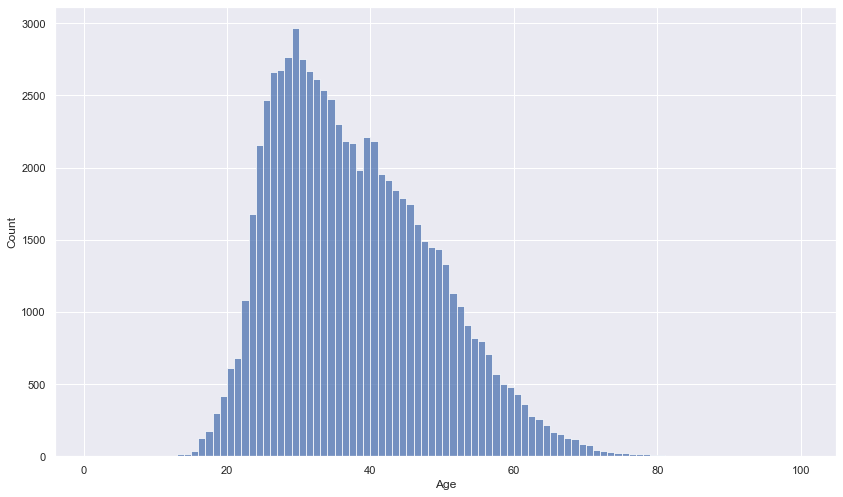

In [140]:
sns.set(rc={'figure.figsize':(14,8.27)})
sns.histplot(df[df['Age'] != 0]['Age'], binwidth=1)

In [229]:
# Oldest
# Female - Gloria Bassler (80)
# Male - Roger Hauge (84), Gurnam Brard	(84)
df[df['Age'] < 22][df['Sex']=='F'].sort_values(by='Age', ascending=False).head(10)

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,...,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City,BirthStr
36719,2014,2816,Mia Nelson,"Merced, CA",40203,4:28:14,10:14,F 20-24/88,F-21,704,...,50.49%,268.233333,1993.0,F,21.0,F 20-24,CA,USA,Merced,1993.0
15078,2010,5528,Tracy Nguyen,"Berkeley, CA",80196,5:43:34,13:07,F 20-24/205,F-21,1831,...,39.42%,343.566667,1989.0,F,21.0,F 20-24,CA,USA,Berkeley,1989.0
15901,2011,359,Nicole Zanardi,"Los Gatos, CA",2381,3:24:43,7:49,F 20-24/4,F-21,35,...,66.15%,204.716667,1990.0,F,21.0,F 20-24,CA,USA,Los Gatos,1990.0
15477,2010,5927,Hale Ozemek,"San Jose, CA",80986,6:34:05,15:02,F 20-24/220,F-21,2032,...,34.36%,394.083333,1989.0,F,21.0,F 20-24,CA,USA,San Jose,1989.0
53274,2017,341,Sophie Payne,"Petaluma, CA",21299,3:26:26,7:53,F 20-24/6,F-21,33,...,65.60%,206.433333,1996.0,F,21.0,F 20-24,CA,USA,Petaluma,1996.0
53477,2017,544,Carly Lutz,"Alamo, CA",30272,3:35:50,8:14,F 20-24/10,F-21,66,...,62.75%,215.833333,1996.0,F,21.0,F 20-24,CA,USA,Alamo,1996.0
39767,2014,5864,India Coleman,"Galveston, TX",70919,5:48:06,13:17,F 20-24/206,F-21,1935,...,38.90%,348.100000,1993.0,F,21.0,F 20-24,TX,USA,Galveston,1993.0
15212,2010,5662,Ksenya Rabover,"San Carlos, CA",70122,5:52:40,13:28,F 20-24/207,F-21,1890,...,38.40%,352.666667,1989.0,F,21.0,F 20-24,CA,USA,San Carlos,1989.0
39708,2014,5805,Ting Li,"Moraga, CA",60733,5:45:18,13:11,F 20-24/204,F-21,1908,...,39.22%,345.300000,1993.0,F,21.0,F 20-24,CA,USA,Moraga,1993.0
39592,2014,5689,Molly O'Connor,"Redland, OR",30848,5:40:18,12:59,F 20-24/198,F-21,1848,...,39.80%,340.300000,1993.0,F,21.0,F 20-24,OR,USA,Redland,1993.0


In [226]:
# youngest
# female = Jasmine Aguirre (13)
# make = Kai Charp (11), Colin Holt (11)
df[df['Age'] >= 4].sort_values(by='Age', ascending=True).head(20)

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,...,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City,BirthStr
46128,2015,5601,Kai Charp,"Albany, CA",70372,5:53:18,13:29,M 01-19/53,M-11,3778,...,40.02%,353.300000,2004.0,M,11.0,M 01-19,CA,USA,Albany,2004.0
23985,2012,2403,Colin Holt,",",51255,4:12:21,9:38,M 01-19/38,M-11,1901,...,60.09%,252.350000,2001.0,M,11.0,M 01-19,,,n/a,2001.0
19143,2011,3601,Chris Verissimo,",",8979,4:38:20,10:37,M 01-19/68,M-12,2633,...,49.10%,278.333333,1999.0,M,12.0,M 01-19,,,n/a,1999.0
1842,2008,1843,Dylan Gujral,"San Francisco, CA",8036,4:17:49,9:50,M 01-19/23,M-12,1461,...,57.01%,257.816667,1996.0,M,12.0,M 01-19,CA,USA,San Francisco,1996.0
51963,2016,5365,Kai Charp,"Albany, CA",70901,5:38:34,12:55,M 01-19/63,M-12,3666,...,40.37%,338.566667,2004.0,M,12.0,M 01-19,CA,USA,Albany,2004.0
20457,2011,4915,Jacob Goeringer,"Modesto, CA",11283,5:12:29,11:56,M 01-19/81,M-12,3429,...,43.74%,312.483333,1999.0,M,12.0,M 01-19,CA,USA,Modesto,1999.0
449,2008,450,Austin Donnelly,"Los Gatos, CA",3335,3:35:14,8:13,M 01-19/9,M-12,407,...,68.29%,215.233333,1996.0,M,12.0,M 01-19,CA,USA,Los Gatos,1996.0
32341,2013,4265,Diego Garcia,"Healdsburg, CA",40202,5:03:32,11:35,M 01-19/38,M-13,3052,...,43.76%,303.533333,2000.0,M,13.0,M 01-19,CA,USA,Healdsburg,2000.0
33821,2013,5745,Jasmine Aguirre,"Livermore, CA",40079,6:27:53,14:48,F 01-19/28,F-13,1880,...,38.43%,387.883333,2000.0,F,13.0,F 01-19,CA,USA,Livermore,2000.0
25200,2012,3618,Chris Verissimo,"Modesto, CA",50582,4:36:38,10:34,M 01-19/50,M-13,2692,...,51.67%,276.633333,1999.0,M,13.0,M 01-19,CA,USA,Modesto,1999.0


In [41]:
Counter(df[df['Country'] == 'USA'][df['State'] == 'CA']['City']).most_common(50)

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[('San Francisco', 12092),
 ('San Jose', 2749),
 ('Los Angeles', 1684),
 ('Oakland', 1372),
 ('Berkeley', 1045),
 ('Fremont', 885),
 ('Sunnyvale', 880),
 ('Mountain View', 720),
 ('Palo Alto', 697),
 ('Sacramento', 653),
 ('San Diego', 650),
 ('San Mateo', 595),
 ('Santa Clara', 577),
 ('Cupertino', 468),
 ('San Ramon', 442),
 ('Daly City', 422),
 ('Walnut Creek', 420),
 ('Redwood City', 417),
 ('Menlo Park', 355),
 ('Alameda', 339),
 ('Long Beach', 336),
 ('Davis', 303),
 ('Irvine', 297),
 ('Pleasanton', 293),
 ('Danville', 277),
 ('Dublin', 270),
 ('Concord', 267),
 ('Milpitas', 253),
 ('Los Gatos', 235),
 ('Hayward', 230),
 ('South San Francisco', 227),
 ('Santa Monica', 226),
 ('San Bruno', 223),
 ('Santa Rosa', 221),
 ('Fresno', 219),
 ('San Rafael', 212),
 ('Livermore', 212),
 ('Campbell', 207),
 ('Burlingame', 204),
 ('San Leandro', 202),
 ('Stanford', 199),
 ('Los Altos', 197),
 ('Foster City', 188),
 ('Pasadena', 180),
 ('Santa Cruz', 179),
 ('Modesto', 175),
 ('Saratoga', 175

<AxesSubplot:xlabel='Age', ylabel='Count'>

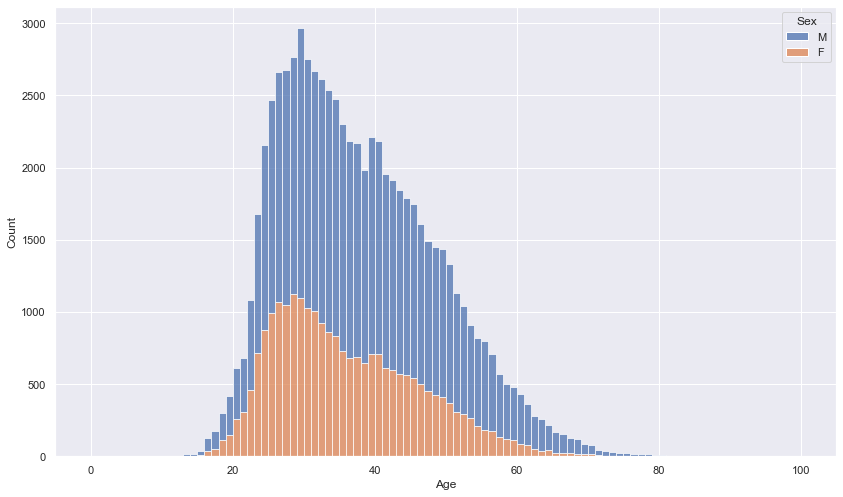

In [42]:
sns.histplot(df[df['Age'] >= 10], hue="Sex", x="Age", multiple='stack', stat='count', binwidth=1, binrange=[0,100])


Text(102.0, 0, 'Total: 73195')

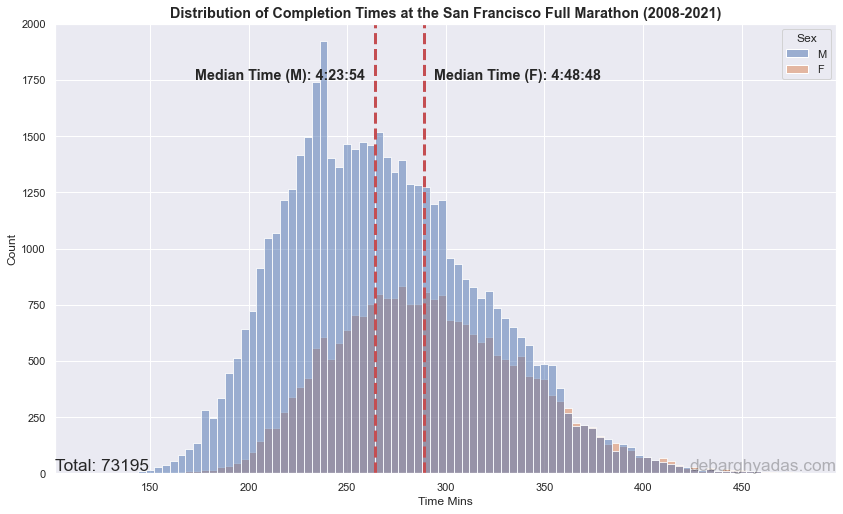

In [193]:
sns.histplot(df[df['Age'] >= 1], hue="Sex", x="Time Mins", multiple='layer',
             stat='count', binwidth=4, binrange=[120,480])
plt.ylim([0, 2000])
median_male = df[df['Sex']=='M']['Time Mins'].median()
plt.plot([median_male,median_male], [0, 10000], 'r--', lw='3')
median_female = df[df['Sex']=='F']['Time Mins'].median()
plt.plot([median_female,median_female], [0, 10000], 'r--', lw='3')
xmin, xmax, ymin, ymax = plt.axis()
plt.title('Distribution of Completion Times at the San Francisco Full Marathon (2008-2021)', fontweight='heavy', 
         fontsize='large')
plt.text(median_female + 5, ymax - 200, f'Median Time (F): {min_to_time(median_female)}', horizontalalignment='left',
         verticalalignment='top',
         fontsize='large', fontweight='bold')
plt.text(median_male - 5, ymax - 200, f'Median Time (M): {min_to_time(median_male)}', horizontalalignment='right',
         verticalalignment='top',
         fontsize='large', fontweight='bold')
plt.text(xmax, 0, 'debarghyadas.com', fontsize='x-large', alpha=0.3, horizontalalignment='right', verticalalignment='bottom')
plt.text(xmin, 0, f'Total: {len(df)}', fontsize='x-large', horizontalalignment='left', verticalalignment='bottom')

<AxesSubplot:xlabel='Time Mins', ylabel='Count'>

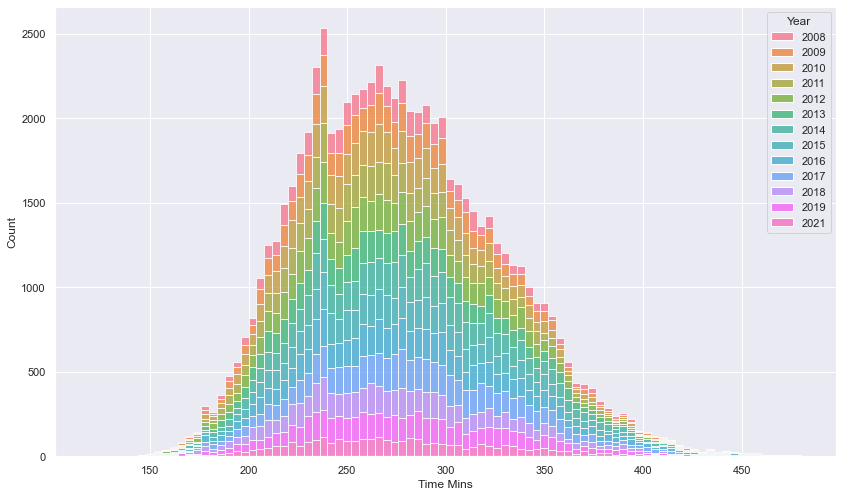

In [46]:
sns.histplot(df[df['Age'] >= 10], hue="Year", x="Time Mins", multiple='stack', stat='count', binwidth=4, binrange=[120,480])

In [51]:
len(Counter(df['Name']+df['Birth'])), len(df)

(58610, 73195)

In [52]:
df.head(10)

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
0,2008,1,Chad Worthen,"Sacramento, CA",29,2:31:52,5:48,M 30-34/0,M-34,1,2:31:52,82.26%,151.866667,1974.0,M,34.0,M 30-34,CA,USA,Sacramento
1,2008,2,Mustapha Berri,"FR,",7,2:33:57,5:53,M 40-44/0,M-44,2,2:33:57,85.97%,153.950000,1964.0,M,44.0,M 40-44,,FR,n/a
2,2008,3,Mark Pilja,"San Francisco, CA",1121,2:38:20,6:03,M 25-29/0,M-28,3,2:38:20,78.90%,158.333333,1980.0,M,28.0,M 25-29,CA,USA,San Francisco
3,2008,4,Jonah Backstrom,"San Francisco, CA",19,2:39:57,6:07,M 30-34/1,M-34,4,2:39:57,78.11%,159.950000,1974.0,M,34.0,M 30-34,CA,USA,San Francisco
4,2008,5,Eric Bowles,"Los Angeles, CA",1074,2:40:24,6:08,M 20-24/1,M-22,5,2:40:24,77.93%,160.400000,1986.0,M,22.0,M 20-24,CA,USA,Los Angeles
5,2008,6,Antonio Lopez,"Santa Fe, NM",9,2:41:38,6:10,M 25-29/1,M-28,6,2:41:38,77.29%,161.633333,1980.0,M,28.0,M 25-29,NM,USA,Santa Fe
6,2008,7,Chikara Omine,"San Francisco, CA",1114,2:41:49,6:11,M 25-29/2,M-25,7,2:41:49,77.20%,161.816667,1983.0,M,25.0,M 25-29,CA,USA,San Francisco
7,2008,8,Jason McCullough,"Hays, KS",23,2:41:58,6:11,M 30-34/2,M-32,8,2:41:58,77.13%,161.966667,1976.0,M,32.0,M 30-34,KS,USA,Hays
8,2008,9,Josh Wright,"Lakewood, CO",1060,2:42:33,6:12,M 25-29/3,M-26,9,2:42:33,76.86%,162.550000,1982.0,M,26.0,M 25-29,CO,USA,Lakewood
9,2008,10,Mongo Romero,"Los Angeles, CA",1115,2:42:49,6:13,M 20-24/2,M-23,10,2:42:49,76.73%,162.816667,1985.0,M,23.0,M 20-24,CA,USA,Los Angeles


In [55]:
df.sample(10)

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
27283,2012,5701,Divya Vats,"San Francisco, CA",70222,5:33:57,12:45,M 35-39/584,M-37,3928,6:27:04,37.56%,333.950000,1975.0,M,37.0,M 35-39,CA,USA,San Francisco
55142,2017,2209,Arturo Molina,"MX,",50010,4:20:03,9:56,M 45-49/175,M-47,1710,4:52:45,51.42%,260.050000,1970.0,M,47.0,M 45-49,,MX,n/a
27366,2012,5784,Rebeca Pena,"Pasadena, CA",70008,5:37:20,12:52,F 40-44/256,F-42,1823,6:39:40,43.20%,337.333333,1970.0,F,42.0,F 40-44,CA,USA,Pasadena
42407,2015,1880,Kyle Moy,"Stanford, CA",20941,4:08:51,9:30,M 20-24/140,M-23,1509,4:13:47,49.41%,248.850000,1992.0,M,23.0,M 20-24,CA,USA,Stanford
70876,2021,867,Suzana Lopez Scherer,"MX,",3171,4:02:32,9:15,F 30-34/25,F-30,125,4:09:38,55.84%,242.533333,1991.0,F,30.0,F 30-34,,MX,n/a
60862,2018,1343,Parker Martin,"Escondido, CA",3751,3:58:07,9:05,M 25-29/214,M-27,1115,4:08:21,51.64%,238.116667,1991.0,M,27.0,M 25-29,CA,USA,Escondido
5558,2009,1109,Paul Johnson,"Sioux Falls, SD",2119,3:52:24,8:52,M 45-49/99,M-46,920,3:54:06,57.94%,232.400000,1963.0,M,46.0,M 45-49,SD,USA,Sioux Falls
58743,2017,5810,Alayna Skelton,"Sparks, NV",80388,5:48:46,13:19,F 35-39/258,F-39,1953,6:50:24,39.79%,348.766667,1978.0,F,39.0,F 35-39,NV,USA,Sparks
39421,2014,5518,Dennis Anzano,"San Jose, CA",60964,5:34:25,12:46,M 30-34/695,M-32,3737,6:24:22,36.77%,334.416667,1982.0,M,32.0,M 30-34,CA,USA,San Jose
68956,2019,4173,Jeffrey Clinton,"San Francisco, CA",6318,5:26:02,12:27,M 50-54/241,M-53,3006,5:42:37,43.21%,326.033333,1966.0,M,53.0,M 50-54,CA,USA,San Francisco


In [216]:
men = df[df['Sex'] == 'M']
women = df[df['Sex'] == 'F']
categories = [df,
              men[df['Age'] < 30],
              men[df['Age'] >= 30][df['Age'] < 50],
              men[df['Age'] >= 50],
              women[df['Age'] < 30],
              women[df['Age'] >= 30][df['Age'] < 50],
              women[df['Age'] >= 50],
             ]
headings = ['Percentile', 'Overall', 'M (<30)', 'M (30-50)', 'M (>50)', 'F (<30)', 'F (30-50)', 'F (>50)']
print('|'.join([''] + headings + ['']))
print('|---------------------'.join([''] + ['' for h in headings] + ['']) + '|')
for i in [0, 1, 5, 10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 95, 99, 100]:
    res = []
    for c in categories:
        percentile = min_to_time(np.percentile(c['Time Mins'], i))
        res.append(percentile)
    vals = '   |  '.join(res)
    print(f'|{100-i}% | {vals} |')


|Percentile|Overall|M (<30)|M (30-50)|M (>50)|F (<30)|F (30-50)|F (>50)|
|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|
|100% | 2:20:42   |  2:23:29   |  2:20:42   |  2:43:36   |  2:42:26   |  2:44:02   |  3:02:37 |
|99% | 2:59:22   |  2:48:09   |  2:56:48   |  3:15:43   |  3:18:01   |  3:22:00   |  3:39:43 |
|95% | 3:22:27   |  3:09:09   |  3:16:49   |  3:33:05   |  3:36:23   |  3:41:36   |  3:56:24 |
|90% | 3:35:11   |  3:22:41   |  3:28:41   |  3:44:47   |  3:48:24   |  3:54:04   |  4:09:35 |
|80% | 3:52:32   |  3:40:11   |  3:44:06   |  3:59:57   |  4:04:24   |  4:11:22   |  4:27:49 |
|75% | 3:58:31   |  3:47:07   |  3:50:43   |  4:07:22   |  4:11:10   |  4:19:01   |  4:35:25 |
|70% | 4:05:39   |  3:52:45   |  3:56:11   |  4:14:34   |  4:16:59   |  4:25:32   |  4:41:25 |
|60% | 4:19:32   |  4:04:18   |  4:08:25   |  4:28:37   |  4:

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/deedy/workspace/scio/python_scio/scio_

In [223]:
headings = ['Time', 'Overall', 'M (<30)', 'M (30-50)', 'M (>50)', 'F (<30)', 'F (30-50)', 'F (>50)']
print('|'.join([''] + headings + ['']))
print('|---------------------'.join([''] + ['' for h in headings] + ['']) + '|')
for i in range(120, 480 + 1, 15):
    res = []
    for c in categories:
        percentileof = 100-stats.percentileofscore(c['Time Mins'], i) 
        res.append(f'{percentileof:0.1f}%')
    vals = '   |  '.join(res)
    print(f'|{min_to_time(i)} | {vals} |')

#     percentileof = 100-stats.percentileofscore(df['Time Mins'], i) 
#     print(f'{min_to_time(i)}: {percentileof:0.2f}% Percentile')

|Time|Overall|M (<30)|M (30-50)|M (>50)|F (<30)|F (30-50)|F (>50)|
|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|---------------------|
|2:00:00 | 100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0% |
|2:15:00 | 100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0% |
|2:30:00 | 100.0%   |  99.9%   |  100.0%   |  100.0%   |  100.0%   |  100.0%   |  100.0% |
|2:45:00 | 99.8%   |  99.2%   |  99.7%   |  100.0%   |  100.0%   |  100.0%   |  100.0% |
|3:00:00 | 98.9%   |  97.3%   |  98.5%   |  99.9%   |  99.8%   |  99.9%   |  100.0% |
|3:15:00 | 96.8%   |  93.2%   |  95.6%   |  99.1%   |  99.2%   |  99.4%   |  99.9% |
|3:30:00 | 92.2%   |  85.9%   |  89.1%   |  95.9%   |  96.8%   |  97.8%   |  99.7% |
|3:45:00 | 84.8%   |  76.8%   |  79.3%   |  89.9%   |  91.6%   |  93.8%   |  98.0% |
|4:00:00 | 73.7%   |  63.1% 

In [77]:
#  - Num M 01-19: 743	4:20:57 +- 0:04:50
#  - Num M 20-24: 3606	4:20:26 +- 0:02:08
#  - Num M 25-29: 8198	4:24:02 +- 0:01:25
#  - Num M 30-34: 8404	4:24:53 +- 0:01:23
print('M 01-34')
print('Boston qualifying: 3:00:00: 97.46% Percentile')
cat_df = df.loc[(df['Category'] == 'M 20-24') | (df['Category'] == 'M 01-19') | (df['Category'] == 'M 25-29') | (df['Category'] == 'M 30-34')]
for i in range(120, 480 + 1, 15):
    percentileof = 100-stats.percentileofscore(cat_df['Time Mins'], i) 
    print(f'{min_to_time(i)}: {percentileof:0.2f}% Percentile')

M 01-34
Boston qualifying: 3:00:00: 97.46% Percentile
2:00:00: 100.00% Percentile
2:15:00: 100.00% Percentile
2:30:00: 99.94% Percentile
2:45:00: 99.37% Percentile
3:00:00: 97.46% Percentile
3:15:00: 93.74% Percentile
3:30:00: 86.75% Percentile
3:45:00: 77.31% Percentile
4:00:00: 63.33% Percentile
4:15:00: 52.34% Percentile
4:30:00: 41.20% Percentile
4:45:00: 31.63% Percentile
5:00:00: 22.61% Percentile
5:15:00: 16.04% Percentile
5:30:00: 10.66% Percentile
5:45:00: 6.51% Percentile
6:00:00: 3.44% Percentile
6:15:00: 1.98% Percentile
6:30:00: 1.10% Percentile
6:45:00: 0.55% Percentile
7:00:00: 0.27% Percentile
7:15:00: 0.15% Percentile
7:30:00: 0.08% Percentile
7:45:00: 0.05% Percentile
8:00:00: 0.03% Percentile


In [76]:
print('F 01-34')
print('Boston qualifying: 3:30:00: 96.93% Percentile')
cat_df = df.loc[(df['Category'] == 'F 20-24') | (df['Category'] == 'F 01-19') | (df['Category'] == 'F 25-29') | (df['Category'] == 'F 30-34')]
for i in range(120, 480 + 1, 15):
    percentileof = 100-stats.percentileofscore(cat_df['Time Mins'], i) 
    print(f'{min_to_time(i)}: {percentileof:0.2f}% Percentile')

F 01-34
Boston qualifying: 3:30:00: 96.93% Percentile
2:00:00: 100.00% Percentile
2:15:00: 100.00% Percentile
2:30:00: 100.00% Percentile
2:45:00: 99.98% Percentile
3:00:00: 99.74% Percentile
3:15:00: 99.13% Percentile
3:30:00: 96.93% Percentile
3:45:00: 91.99% Percentile
4:00:00: 83.14% Percentile
4:15:00: 72.82% Percentile
4:30:00: 60.59% Percentile
4:45:00: 48.19% Percentile
5:00:00: 36.42% Percentile
5:15:00: 26.58% Percentile
5:30:00: 18.44% Percentile
5:45:00: 11.84% Percentile
6:00:00: 7.10% Percentile
6:15:00: 4.07% Percentile
6:30:00: 2.12% Percentile
6:45:00: 1.16% Percentile
7:00:00: 0.61% Percentile
7:15:00: 0.40% Percentile
7:30:00: 0.22% Percentile
7:45:00: 0.13% Percentile
8:00:00: 0.11% Percentile


In [83]:
#  - Num M 01-19: 743	4:20:57 +- 0:04:50
#  - Num M 20-24: 3606	4:20:26 +- 0:02:08
#  - Num M 25-29: 8198	4:24:02 +- 0:01:25
#  - Num M 30-34: 8404	4:24:53 +- 0:01:23
print('M 35-39')
i = 185
cat_df = df.loc[(df['Category'] == 'M 35-39')]
percentileof = 100-stats.percentileofscore(cat_df['Time Mins'], i) 
# Boston Qualifying M 35-39: 3:05:00: 97.88% Percentile
print(f'Boston Qualifying: {min_to_time(i)}: {percentileof:0.2f}% Percentile')
for i in range(120, 480 + 1, 15):
    percentileof = 100-stats.percentileofscore(cat_df['Time Mins'], i) 
    print(f'{min_to_time(i)}: {percentileof:0.2f}% Percentile')

M 35-39
Boston Qualifying: 3:05:00: 97.88% Percentile
2:00:00: 100.00% Percentile
2:15:00: 100.00% Percentile
2:30:00: 99.92% Percentile
2:45:00: 99.68% Percentile
3:00:00: 98.39% Percentile
3:15:00: 95.24% Percentile
3:30:00: 88.79% Percentile
3:45:00: 78.45% Percentile
4:00:00: 65.19% Percentile
4:15:00: 53.42% Percentile
4:30:00: 41.15% Percentile
4:45:00: 31.61% Percentile
5:00:00: 22.33% Percentile
5:15:00: 15.92% Percentile
5:30:00: 10.72% Percentile
5:45:00: 6.60% Percentile
6:00:00: 3.47% Percentile
6:15:00: 2.10% Percentile
6:30:00: 1.22% Percentile
6:45:00: 0.61% Percentile
7:00:00: 0.23% Percentile
7:15:00: 0.11% Percentile
7:30:00: 0.11% Percentile
7:45:00: 0.04% Percentile
8:00:00: 0.03% Percentile


In [82]:
#  - Num M 01-19: 743	4:20:57 +- 0:04:50
#  - Num M 20-24: 3606	4:20:26 +- 0:02:08
#  - Num M 25-29: 8198	4:24:02 +- 0:01:25
#  - Num M 30-34: 8404	4:24:53 +- 0:01:23
print('M 40-44')
i = 190
cat_df = df.loc[(df['Category'] == 'M 40-44')]
percentileof = 100-stats.percentileofscore(cat_df['Time Mins'], i) 
# Boston Qualifying M 35-39: 3:05:00: 97.88% Percentile
print(f'Boston Qualifying: {min_to_time(i)}: {percentileof:0.2f}% Percentile')
for i in range(120, 480 + 1, 15):
    percentileof = 100-stats.percentileofscore(cat_df['Time Mins'], i) 
    print(f'{min_to_time(i)}: {percentileof:0.2f}% Percentile')

M 40-44
Boston Qualifying: 3:10:00: 97.47% Percentile
2:00:00: 100.00% Percentile
2:15:00: 100.00% Percentile
2:30:00: 99.97% Percentile
2:45:00: 99.80% Percentile
3:00:00: 98.88% Percentile
3:15:00: 95.83% Percentile
3:30:00: 89.41% Percentile
3:45:00: 79.86% Percentile
4:00:00: 67.15% Percentile
4:15:00: 56.12% Percentile
4:30:00: 44.71% Percentile
4:45:00: 33.51% Percentile
5:00:00: 24.10% Percentile
5:15:00: 17.98% Percentile
5:30:00: 11.69% Percentile
5:45:00: 6.88% Percentile
6:00:00: 3.90% Percentile
6:15:00: 2.47% Percentile
6:30:00: 1.36% Percentile
6:45:00: 0.69% Percentile
7:00:00: 0.35% Percentile
7:15:00: 0.18% Percentile
7:30:00: 0.14% Percentile
7:45:00: 0.05% Percentile
8:00:00: 0.03% Percentile


In [113]:
boston = {
    'M 01-34': (180, ['M 20-24', 'M 01-19', 'M 25-29', 'M 30-34']),
    'M 35-39': (185, ['M 35-39']),
    'M 40-44': (190, ['M 40-44']),
    'M 45-49': (200, ['M 45-49']),
    'M 50-54': (205, ['M 50-54']),
    'M 55-59': (215, ['M 55-59']),
    'M 60-64': (230, ['M 60-64']),
    'M 65-69': (245, ['M 65-69']),
    'M 70-74': (260, ['M 70-74']),
    'M 75-79': (275, ['M 75-79']),
    'F 01-34': (210, ['F 20-24', 'F 01-19', 'F 25-29', 'F 30-34']),
    'F 35-39': (215, ['F 35-39']),
    'F 40-44': (220, ['F 40-44']),
    'F 45-49': (230, ['F 45-49']),
    'F 50-54': (235, ['F 50-54']),
    'F 55-59': (245, ['F 55-59']),
    'F 60-64': (260, ['F 60-64']),
    'F 65-69': (275, ['F 65-69']),
    'F 70-74': (290, ['F 70-74']),
    'F 75-79': (305, ['F 75-79']),
}
import functools
def get_boston_qual(category, cutoff=0):
    time, cond = boston[category]
    time = time - cutoff
    cond_eval = [df['Category'] == x for x in cond]
    res = functools.reduce(lambda a, b: a | b, cond_eval)
    cat_df = df.loc[res]
    percentileof = 100-stats.percentileofscore(cat_df['Time Mins'], time)
    total = len(cat_df)
    qualifiers = round(len(cat_df)*(1 - percentileof/100))
#     print(f'{category} {min_to_time(time)}: {percentileof:0.2f}% Percentile - {total} total, {qualifiers} qualifiers')
    return total, qualifiers

cutoffs = [
    ('2012', '1:14', 1+(14/60), 27000),
    ('2013', '0:00', 0, 27000),
('2014', '1:38', 1+(38/60), 36000),
('2015', '1:02', 1+(2/60), 30000),
('2016', '2:28', 2+(28/60), 30000),
('2017', '2:09', 2+(9/60), 30000),
('2018', '3:23', 3+(23/60), 30000),
('2019', '4:52', 4+(52/60), 30000),
('2020', '1:39', 1+(39/60), 31500),
('2021', '7:47', 7+(47/60), 20000)
]
for yr, co, cutoff, fieldsize in cutoffs: 
    grandtotal, grandqualifier = 0, 0
    for cat in boston.keys():
        t, q = get_boston_qual(cat, cutoff)
        grandtotal += t
        grandqualifier += q
    print(f'Year: {yr}, Cutoff: {co}, Qualifiers: {grandqualifier}, Total: {grandtotal}, Acceptance: {100*grandqualifier/grandtotal:0.2f}%, From SF: {100*grandqualifier/fieldsize:0.2f}%')    

Year: 2012, Cutoff: 1:14, Qualifiers: 2198, Total: 72721, Acceptance: 3.02%, From SF: 8.14%
Year: 2013, Cutoff: 0:00, Qualifiers: 2447, Total: 72721, Acceptance: 3.36%, From SF: 9.06%
Year: 2014, Cutoff: 1:38, Qualifiers: 2127, Total: 72721, Acceptance: 2.92%, From SF: 5.91%
Year: 2015, Cutoff: 1:02, Qualifiers: 2233, Total: 72721, Acceptance: 3.07%, From SF: 7.44%
Year: 2016, Cutoff: 2:28, Qualifiers: 1985, Total: 72721, Acceptance: 2.73%, From SF: 6.62%
Year: 2017, Cutoff: 2:09, Qualifiers: 2038, Total: 72721, Acceptance: 2.80%, From SF: 6.79%
Year: 2018, Cutoff: 3:23, Qualifiers: 1862, Total: 72721, Acceptance: 2.56%, From SF: 6.21%
Year: 2019, Cutoff: 4:52, Qualifiers: 1658, Total: 72721, Acceptance: 2.28%, From SF: 5.53%
Year: 2020, Cutoff: 1:39, Qualifiers: 2122, Total: 72721, Acceptance: 2.92%, From SF: 6.74%
Year: 2021, Cutoff: 7:47, Qualifiers: 1275, Total: 72721, Acceptance: 1.75%, From SF: 6.38%


- Year: 2012, Cutoff: 1:14, Qualifiers: 2198, Total: 72721, Acceptance: 3.02%
- Year: 2013, Cutoff: 0:00, Qualifiers: 2447, Total: 72721, Acceptance: 3.36%
- Year: 2014, Cutoff: 1:38, Qualifiers: 2127, Total: 72721, Acceptance: 2.92%
- Year: 2015, Cutoff: 1:02, Qualifiers: 2233, Total: 72721, Acceptance: 3.07%
- Year: 2016, Cutoff: 2:28, Qualifiers: 1985, Total: 72721, Acceptance: 2.73%
- Year: 2017, Cutoff: 2:09, Qualifiers: 2038, Total: 72721, Acceptance: 2.80%
- Year: 2018, Cutoff: 3:23, Qualifiers: 1862, Total: 72721, Acceptance: 2.56%
- Year: 2019, Cutoff: 4:52, Qualifiers: 1658, Total: 72721, Acceptance: 2.28%
- Year: 2020, Cutoff: 1:39, Qualifiers: 2122, Total: 72721, Acceptance: 2.92%
- Year: 2021, Cutoff: 7:47, Qualifiers: 1275, Total: 72721, Acceptance: 1.75%


In [111]:
len(df)

73195

In [119]:
df[df['Sex']=='M']['Age'].mean(), df[df['Sex']=='M']['Age'].median()

(38.031263462366915, 37.0)

In [120]:
df[df['Sex']=='F']['Age'].mean(), df[df['Sex']=='F']['Age'].median()

(35.4759410801964, 34.0)

In [123]:
for year in Counter(df['Year']).keys():
    yr_df = df[df['Year']==year]
    yr_df.reset_index(drop=True)
    avg_age_woman = yr_df[df['Sex']=='F']['Age'].median()
    avg_age_man = yr_df[df['Sex']=='M']['Age'].median()
    print(f'Year: {year}, Female Median: {avg_age_woman}, Male Median: {avg_age_man}')

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing t

Year: 2008, Female Median: 32.0, Male Median: 37.0
Year: 2009, Female Median: 33.0, Male Median: 38.0
Year: 2010, Female Median: 34.0, Male Median: 38.0
Year: 2011, Female Median: 34.0, Male Median: 37.0
Year: 2012, Female Median: 34.0, Male Median: 37.0
Year: 2013, Female Median: 33.0, Male Median: 36.0
Year: 2014, Female Median: 34.0, Male Median: 37.0
Year: 2015, Female Median: 34.0, Male Median: 37.0


/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing t

Year: 2016, Female Median: 34.0, Male Median: 36.0
Year: 2017, Female Median: 34.0, Male Median: 37.0
Year: 2018, Female Median: 33.0, Male Median: 36.0
Year: 2019, Female Median: 35.0, Male Median: 36.0
Year: 2021, Female Median: 32.0, Male Median: 33.0


In [125]:
# Male median is 37, female is 34, and this year it went down to 33 and 32. Ages for marathon are getting younger
for year in Counter(df['Year']).keys():
    yr_df = df[df['Year']==year]
    yr_df.reset_index(drop=True)
    avg_age_woman = min_to_time(yr_df[df['Sex']=='F']['Time Mins'].median())
    avg_age_man = min_to_time(yr_df[df['Sex']=='M']['Time Mins'].median())
    print(f'Year: {year}, Female Median: {avg_age_woman}, Male Median: {avg_age_man}')

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel

Year: 2008, Female Median: 4:46:45, Male Median: 4:18:14
Year: 2009, Female Median: 4:43:11, Male Median: 4:20:22
Year: 2010, Female Median: 4:41:25, Male Median: 4:18:25
Year: 2011, Female Median: 4:39:56, Male Median: 4:18:15
Year: 2012, Female Median: 4:44:52, Male Median: 4:19:34
Year: 2013, Female Median: 4:46:51, Male Median: 4:20:57


/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel

Year: 2014, Female Median: 4:53:44, Male Median: 4:29:42
Year: 2015, Female Median: 4:51:53, Male Median: 4:25:27
Year: 2016, Female Median: 4:54:00, Male Median: 4:28:30
Year: 2017, Female Median: 4:58:51, Male Median: 4:32:47
Year: 2018, Female Median: 4:47:40, Male Median: 4:22:33
Year: 2019, Female Median: 4:52:54, Male Median: 4:27:34
Year: 2021, Female Median: 4:46:33, Male Median: 4:26:41


/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [128]:
df['Place'] = pd.to_numeric(df['Place'])
df[df['Place'] == 1]

,Year,Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade,Time Mins,Birth,Sex,Age,Category,State,Country,City
0,2008,1,Chad Worthen,"Sacramento, CA",29,2:31:52,5:48,M 30-34/0,M-34,1,2:31:52,82.26%,151.866667,1974.0,M,34.0,M 30-34,CA,USA,Sacramento
4450,2009,1,Andrew Cook,"Flower Mound, TX",1,2:26:32,5:36,M 25-29/0,M-28,1,2:26:32,85.26%,146.533333,1981.0,M,28.0,M 25-29,TX,USA,Flower Mound
9551,2010,1,Keith Bechtol,"Palo Alto, CA",30811,2:23:29,5:29,M 25-29/0,M-25,1,2:23:29,87.08%,143.483333,1985.0,M,25.0,M 25-29,CA,USA,Palo Alto
15543,2011,1,Michael Wardian,"Arlington, VA",104,2:27:06,5:37,M 35-39/0,M-37,1,2:27:06,84.59%,147.100000,1974.0,M,37.0,M 35-39,VA,USA,Arlington
21583,2012,1,Nathan Krah,"Salt Lake City, UT",3,2:26:44,5:36,M 25-29/0,M-26,1,2:26:44,85.15%,146.733333,1986.0,M,26.0,M 25-29,UT,USA,Salt Lake City
28077,2013,1,Francois Lhuissier,"New York,",3,2:25:15,5:33,M 35-39/0,M-35,1,2:25:15,85.09%,145.250000,1978.0,M,35.0,M 35-39,,New York,n/a
33904,2014,1,August Brautigam,"Reno, NV",33,2:32:17,5:49,M 25-29/0,M-29,1,2:32:17,80.75%,152.283333,1985.0,M,29.0,M 25-29,NV,USA,Reno
40528,2015,1,Chris Mocko,"San Francisco, CA",7,2:26:22,5:35,M 25-29/0,M-29,1,2:26:22,84.01%,146.366667,1986.0,M,29.0,M 25-29,CA,USA,San Francisco
46599,2016,1,Max Haines-Stiles,"San Francisco, CA",13,2:30:42,5:45,M 30-34/0,M-30,1,2:30:42,81.59%,150.700000,1986.0,M,30.0,M 30-34,CA,USA,San Francisco
52934,2017,1,Jorge Maravilla,"Mill Valley, CA",3,2:28:23,5:40,M 35-39/0,M-39,1,2:28:23,84.71%,148.383333,1978.0,M,39.0,M 35-39,CA,USA,Mill Valley
